<a href="https://colab.research.google.com/github/jvergara9208/TalentoTec_Jonathan/blob/main/ProyectoTalentoTec.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analisis de la Penetracion de Internet Fijo en bogota para el 2024 y 2025

# Definición

## INTRODUCCION

El objetivo de este proyecto es analizar la penetración de internet fijo en diversas regiones de Colombia utilizando el conjunto de datos de Penetración de Internet Fijo de 2022 a 2023. Los datos incluyen campos como departamentos, municipios, número de accesos a internet fijo, estimaciones de población (DANE) e índices calculados. Nos centraremos en entender las tendencias, las disparidades regionales y las proyecciones futuras, en particular para Bogotá, en los años 2024 y 2025.

## Descripcion del problema

El principal problema es predecir el crecimiento de los accesos a internet fijo en Bogotá para los años 2024 y 2025. El conjunto de datos proporciona datos históricos que nos ayudarán a identificar patrones de crecimiento de la penetración de internet y a predecir cómo podría cambiar en el futuro. El desafío es utilizar las tendencias históricas, posiblemente combinadas con factores externos como el crecimiento de la población y el desarrollo de la infraestructura tecnológica, para hacer predicciones fiables.

[Internet Fijo Penetración Departamentos
](https://www.datos.gov.co/Ciencia-Tecnolog-a-e-Innovaci-n/Internet-Fijo-Penetraci-n-Departamentos/4py7-br84/about_data)

**Número de suscriptores con acceso fijo a Internet** para cada uno de los departamentos de Colombia según los datos reportados por los proveedores al último día de cada trimestre . Basados en estos datos, y en las proyecciones del DANE para la población por departamento, consolidado 2015-4T al 2019 1T, se muestra el porcentaje de penetración de Internet fijo para cada trimestre.

Última Actualización
17 de septiembre de 2024

Datos suministrados por
Ministerio de Tecnologías de la Información y las Comunicaciones

##  Pasos para el análisis de los datos

**Limpieza de datos:** Verificar que no haya valores nulos o erróneos, especialmente en las columnas de año, trimestre, accesos a internet y población.

**Análisis exploratorio de datos (EDA):** Observar las tendencias a lo largo del tiempo para distintos departamentos y municipios, analizando cómo ha evolucionado el índice de penetración de internet.

**Filtrado de datos:** Extraer específicamente los datos de Bogotá para centrarnos en la predicción para esta ciudad.

**Análisis de tendencias:** Visualizar el crecimiento de los accesos a internet fijo en Bogotá en el período 2022-2023.

**Análisis de correlación:** Evaluar cómo los accesos a internet fijo están relacionados con el tamaño de la población y otros factores relevantes.

## Enfoque para la predicción 2024-2025

 La predicción del crecimiento de los accesos a internet fijo en Bogotá se llevará a cabo utilizando redes neuronales. Las redes neuronales permiten capturar patrones complejos en los datos, lo cual es ideal para identificar tendencias y prever el crecimiento a largo plazo. El enfoque detallado es el siguiente:



*   **Preparación de los datos:** Extraer y transformar los datos históricos de Bogotá, y calcular la tasa de crecimiento anual de los accesos a internet fijo.
*   **Entrenamiento del modelo:** Entrenar una red neuronal utilizando los datos históricos, para que el modelo aprenda a capturar la tendencia en el.
*  **Predicciones:** Utilizar la red neuronal entrenada para proyectar el crecimiento de los accesos a internet fijo en Bogotá para los años 2024 y 2025.






## Técnicas de análisis





*   Redes neuronales: La red neuronal será el modelo principal utilizado para la predicción de accesos a internet fijo, dada su capacidad para manejar relaciones no lineales y patrones complejos en los datos.
*   Análisis de series de tiempo: Si se cuenta con datos de un período más extenso, podríamos complementar la predicción con métodos de series de tiempo, como ARIMA, para contrastar los resultados de la red neuronal.

*  Visualización: Representar gráficamente el crecimiento de los accesos a internet en Bogotá a lo largo del tiempo y proyectar la tendencia para 2024-2025. Comparar visualmente el crecimiento de Bogotá con el de otros municipios clave para observar diferencias regionales.






## Visualizaciones potenciales





*   **Gráfico de series temporales:** Mostrar el crecimiento de los accesos a internet fijo en Bogotá durante 2022-2023, incluyendo las proyecciones para 2024-2025 basadas en el modelo de red neuronal.

*  **Gráfico de barras:** Comparar el número total de accesos a internet fijo en Bogotá con otros municipios clave, destacando las diferencias en la penetración de internet.
*   **Gráfico de tasa de crecimiento:** Visualizar la tasa de crecimiento de los accesos a internet en Bogotá, mostrando el ritmo de cambio a lo largo del tiempo.




## Conclusión

Al finalizar el análisis, se resumirán las tendencias y el escenario futuro basado en las predicciones para 2024-2025, señalando los factores que podrían influir en el crecimiento de los accesos a internet fijo en Bogotá. Además, se discutirá cómo el crecimiento de Bogotá se compara con otras regiones, considerando posibles diferencias en infraestructura y crecimiento poblacional.

# Desarrollo

## Importación de Librerías

Primero, importaremos las librerías necesarias para el análisis y la predicción de los datos. Vamos a utilizar pandas para la manipulación de datos, matplotlib y seaborn para la visualización, y tensorflow para construir y entrenar la red neuronal.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


Leemos el conjunto de datos y mostramos sus primeras filas para entender su estructura.

In [2]:
# URL del archivo CSV en formato raw
url = "https://raw.githubusercontent.com/jvergara9208/TalentoTec_Jonathan/main/Proyecto/DataSet/Internet_Fijo_Penetraci_n_Municipio_20241019.csv"

# Cargar el archivo en un DataFrame
df_carga = pd.read_csv(url)
data=df_carga.copy()
# Ver las primeras filas del DataFrame
data.head()


,AÑO,TRIMESTRE,COD_DEPARTAMENTO,DEPARTAMENTO,COD_MUNICIPIO,MUNICIPIO,No. ACCESOS FIJOS A INTERNET,POBLACIÓN DANE,INDICE
0,2023,2,5,ANTIOQUIA,5353,HISPANIA,495,5790,"8,55"
1,2023,1,17,CALDAS,17001,MANIZALES,102906,454494,"22,64"
2,2023,1,52,NARIÑO,52356,IPIALES,11312,120842,"9,36"
3,2022,4,27,CHOCÓ,27160,CÉRTEGUI,179,5967,"3,00"
4,2022,3,15,BOYACÁ,15740,SIACHOQUE,116,7056,"1,64"


Limpieza De datos

Limpiaremos los datos eliminando valores faltantes y filtrando únicamente la información de Bogotá. Además, convertiremos los datos categóricos a valores numéricos si es necesario.

In [3]:
# Eliminar valores nulos
data = data.dropna()

# Filtrar datos solo para Bogotá
bogota_data = data[data['DEPARTAMENTO'] == 'BOGOTÁ D.C.']

# Confirmar los datos después del filtro
bogota_data.head()


,AÑO,TRIMESTRE,COD_DEPARTAMENTO,DEPARTAMENTO,COD_MUNICIPIO,MUNICIPIO,No. ACCESOS FIJOS A INTERNET,POBLACIÓN DANE,INDICE
628,2022,4,11,BOGOTÁ D.C.,11001,"BOGOTÁ, D.C.",2269823,7873316,"28,83"
906,2021,4,11,BOGOTÁ D.C.,11001,"BOGOTÁ, D.C.",2171274,7823334,"27,75"
917,2022,3,11,BOGOTÁ D.C.,11001,"BOGOTÁ, D.C.",2261755,7873316,"28,73"
2493,2023,3,11,BOGOTÁ D.C.,11001,"BOGOTÁ, D.C.",2251960,7907281,"28,48"
6569,2021,3,11,BOGOTÁ D.C.,11001,"BOGOTÁ, D.C.",2157112,7823334,"27,57"


In [4]:
# Número de filas y columnas
filas, columnas = bogota_data.shape
print(f"El DataFrame tiene {filas} filas y {columnas} columnas.")


El DataFrame tiene 32 filas y 9 columnas.


In [5]:
# Ordenar el DataFrame por AÑO y TRIMESTRE
bogota_data = bogota_data.sort_values(by=['AÑO', 'TRIMESTRE'], ascending=[True, True])

# Mostrar el DataFrame ordenado
bogota_data.head()

# Configuración para mostrar todas las filas
pd.set_option('display.max_rows', None)

# Mostrar el DataFrame completo
bogota_data


,AÑO,TRIMESTRE,COD_DEPARTAMENTO,DEPARTAMENTO,COD_MUNICIPIO,MUNICIPIO,No. ACCESOS FIJOS A INTERNET,POBLACIÓN DANE,INDICE
18771,2015,4,11,BOGOTÁ D.C.,11001,"BOGOTÁ, D.C.",1610511,7273265,"22,14"
30907,2016,1,11,BOGOTÁ D.C.,11001,"BOGOTÁ, D.C.",1647186,7300918,"22,56"
18047,2016,2,11,BOGOTÁ D.C.,11001,"BOGOTÁ, D.C.",1681117,7300918,"23,03"
24086,2016,3,11,BOGOTÁ D.C.,11001,"BOGOTÁ, D.C.",1719075,7300918,"23,55"
19515,2016,4,11,BOGOTÁ D.C.,11001,"BOGOTÁ, D.C.",1728459,7300918,"23,67"
19722,2017,1,11,BOGOTÁ D.C.,11001,"BOGOTÁ, D.C.",2638171,7337449,"35,95"
31959,2017,2,11,BOGOTÁ D.C.,11001,"BOGOTÁ, D.C.",1776768,7337449,"24,22"
32574,2017,3,11,BOGOTÁ D.C.,11001,"BOGOTÁ, D.C.",1807827,7337449,"24,64"
17650,2017,4,11,BOGOTÁ D.C.,11001,"BOGOTÁ, D.C.",1818094,7337449,"24,78"
30078,2018,1,11,BOGOTÁ D.C.,11001,"BOGOTÁ, D.C.",1826350,7412566,"24,64"


uniremos las columnas de trimestre y año

para combinar las columnas AÑO y TRIMESTRE en una sola columna, vamos a usar el método .astype(str) para convertir ambos valores en texto y luego concatenarlos. Esto te permitirá crear una columna con un formato como AÑO-TRIMESTRE (por ejemplo, 2022-4).

In [6]:
# Crear una nueva columna combinando AÑO y TRIMESTRE como número
bogota_data['AÑO_TRIMESTRE'] = bogota_data['AÑO'].astype(str) + bogota_data['TRIMESTRE'].apply(lambda x: f"{x:02d}")

# Opcional: eliminar las columnas originales
bogota_data = bogota_data.drop(columns=['AÑO', 'TRIMESTRE'])

# Convertir la columna AÑO_TRIMESTRE a entero
bogota_data['AÑO_TRIMESTRE'] = bogota_data['AÑO_TRIMESTRE'].astype(int)

# Reordenar las columnas para que AÑO_TRIMESTRE esté al principio
cols = ['AÑO_TRIMESTRE'] + [col for col in bogota_data.columns if col != 'AÑO_TRIMESTRE']
bogota_data = bogota_data[cols]

# Ver el DataFrame actualizado
bogota_data.head()

,AÑO_TRIMESTRE,COD_DEPARTAMENTO,DEPARTAMENTO,COD_MUNICIPIO,MUNICIPIO,No. ACCESOS FIJOS A INTERNET,POBLACIÓN DANE,INDICE
18771,201504,11,BOGOTÁ D.C.,11001,"BOGOTÁ, D.C.",1610511,7273265,"22,14"
30907,201601,11,BOGOTÁ D.C.,11001,"BOGOTÁ, D.C.",1647186,7300918,"22,56"
18047,201602,11,BOGOTÁ D.C.,11001,"BOGOTÁ, D.C.",1681117,7300918,"23,03"
24086,201603,11,BOGOTÁ D.C.,11001,"BOGOTÁ, D.C.",1719075,7300918,"23,55"
19515,201604,11,BOGOTÁ D.C.,11001,"BOGOTÁ, D.C.",1728459,7300918,"23,67"


In [7]:
# Configuración para mostrar todas las filas
pd.set_option('display.max_rows', None)

# Mostrar el DataFrame completo
bogota_data


,AÑO_TRIMESTRE,COD_DEPARTAMENTO,DEPARTAMENTO,COD_MUNICIPIO,MUNICIPIO,No. ACCESOS FIJOS A INTERNET,POBLACIÓN DANE,INDICE
18771,201504,11,BOGOTÁ D.C.,11001,"BOGOTÁ, D.C.",1610511,7273265,"22,14"
30907,201601,11,BOGOTÁ D.C.,11001,"BOGOTÁ, D.C.",1647186,7300918,"22,56"
18047,201602,11,BOGOTÁ D.C.,11001,"BOGOTÁ, D.C.",1681117,7300918,"23,03"
24086,201603,11,BOGOTÁ D.C.,11001,"BOGOTÁ, D.C.",1719075,7300918,"23,55"
19515,201604,11,BOGOTÁ D.C.,11001,"BOGOTÁ, D.C.",1728459,7300918,"23,67"
19722,201701,11,BOGOTÁ D.C.,11001,"BOGOTÁ, D.C.",2638171,7337449,"35,95"
31959,201702,11,BOGOTÁ D.C.,11001,"BOGOTÁ, D.C.",1776768,7337449,"24,22"
32574,201703,11,BOGOTÁ D.C.,11001,"BOGOTÁ, D.C.",1807827,7337449,"24,64"
17650,201704,11,BOGOTÁ D.C.,11001,"BOGOTÁ, D.C.",1818094,7337449,"24,78"
30078,201801,11,BOGOTÁ D.C.,11001,"BOGOTÁ, D.C.",1826350,7412566,"24,64"


 eliminaremos las columnas COD_DEPARTAMENTO y COD_MUNICIPIO, usaremos elel método .drop() en pandas, especificando los nombres de las columnas, ya que estas no nos proporciona una informacion relevante.

In [8]:
# Eliminar las columnas COD_DEPARTAMENTO y COD_MUNICIPIO
bogota_data = bogota_data.drop(columns=['COD_DEPARTAMENTO', 'COD_MUNICIPIO'])

# Ver el DataFrame actualizado
bogota_data.head()


,AÑO_TRIMESTRE,DEPARTAMENTO,MUNICIPIO,No. ACCESOS FIJOS A INTERNET,POBLACIÓN DANE,INDICE
18771,201504,BOGOTÁ D.C.,"BOGOTÁ, D.C.",1610511,7273265,"22,14"
30907,201601,BOGOTÁ D.C.,"BOGOTÁ, D.C.",1647186,7300918,"22,56"
18047,201602,BOGOTÁ D.C.,"BOGOTÁ, D.C.",1681117,7300918,"23,03"
24086,201603,BOGOTÁ D.C.,"BOGOTÁ, D.C.",1719075,7300918,"23,55"
19515,201604,BOGOTÁ D.C.,"BOGOTÁ, D.C.",1728459,7300918,"23,67"


renombramos la columna indice por  INDICE a INDICE(%)



In [9]:
# Renombrar la columna INDICE a INDICE(%)
bogota_data = bogota_data.rename(columns={'INDICE': 'INDICE(%)'})

# Ver el DataFrame actualizado
# Configuración para mostrar todas las filas
pd.set_option('display.max_rows', None)

# Mostrar el DataFrame completo
bogota_data


,AÑO_TRIMESTRE,DEPARTAMENTO,MUNICIPIO,No. ACCESOS FIJOS A INTERNET,POBLACIÓN DANE,INDICE(%)
18771,201504,BOGOTÁ D.C.,"BOGOTÁ, D.C.",1610511,7273265,"22,14"
30907,201601,BOGOTÁ D.C.,"BOGOTÁ, D.C.",1647186,7300918,"22,56"
18047,201602,BOGOTÁ D.C.,"BOGOTÁ, D.C.",1681117,7300918,"23,03"
24086,201603,BOGOTÁ D.C.,"BOGOTÁ, D.C.",1719075,7300918,"23,55"
19515,201604,BOGOTÁ D.C.,"BOGOTÁ, D.C.",1728459,7300918,"23,67"
19722,201701,BOGOTÁ D.C.,"BOGOTÁ, D.C.",2638171,7337449,"35,95"
31959,201702,BOGOTÁ D.C.,"BOGOTÁ, D.C.",1776768,7337449,"24,22"
32574,201703,BOGOTÁ D.C.,"BOGOTÁ, D.C.",1807827,7337449,"24,64"
17650,201704,BOGOTÁ D.C.,"BOGOTÁ, D.C.",1818094,7337449,"24,78"
30078,201801,BOGOTÁ D.C.,"BOGOTÁ, D.C.",1826350,7412566,"24,64"


In [10]:
# Guardar el DataFrame actualizado en un archivo CSV
#bogota_data.to_csv('bogota_data_actualizado.csv', index=False)

# Descargar el archivo CSV generado
#from google.colab import files
#files.download('bogota_data_actualizado.csv')

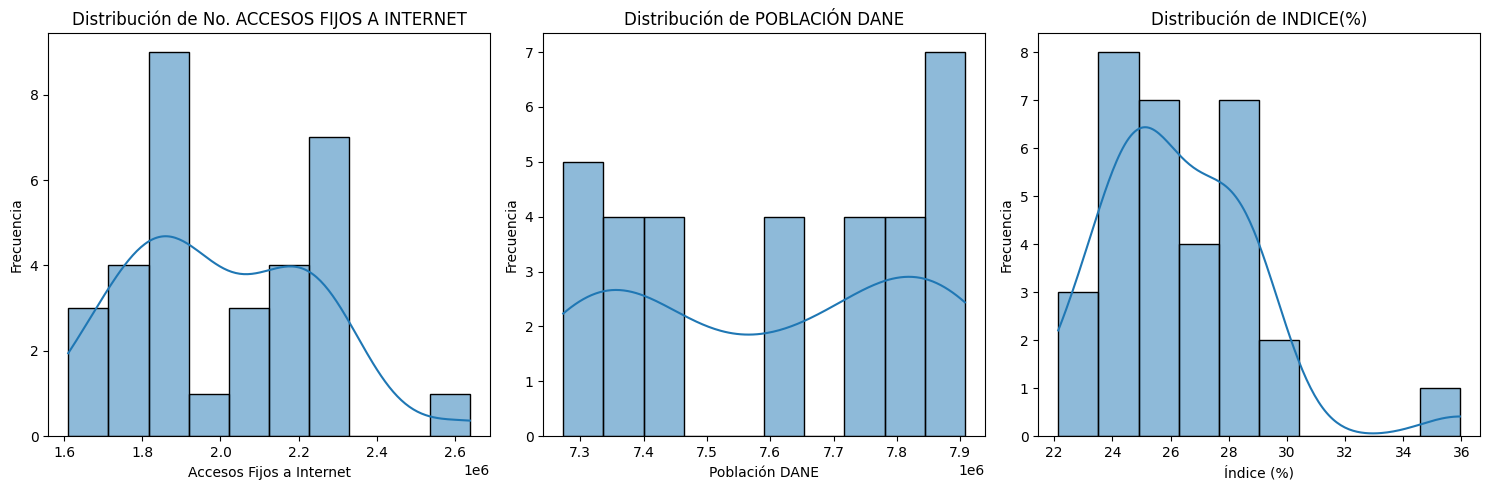

In [11]:

# Convertir "INDICE(%)" a formato numérico, reemplazando la coma por un punto decimal
bogota_data['INDICE(%)'] = bogota_data['INDICE(%)'].str.replace(',', '.').astype(float)

# Crear histogramas para las columnas numéricas
plt.figure(figsize=(15, 5))

# Histograma para "No. ACCESOS FIJOS A INTERNET"
plt.subplot(1, 3, 1)
sns.histplot(bogota_data['No. ACCESOS FIJOS A INTERNET'], bins=10, kde=True)
plt.title('Distribución de No. ACCESOS FIJOS A INTERNET')
plt.xlabel('Accesos Fijos a Internet')
plt.ylabel('Frecuencia')

# Histograma para "POBLACIÓN DANE"
plt.subplot(1, 3, 2)
sns.histplot(bogota_data['POBLACIÓN DANE'], bins=10, kde=True)
plt.title('Distribución de POBLACIÓN DANE')
plt.xlabel('Población DANE')
plt.ylabel('Frecuencia')

# Histograma para "INDICE(%)"
plt.subplot(1, 3, 3)
sns.histplot(bogota_data['INDICE(%)'], bins=10, kde=True)
plt.title('Distribución de INDICE(%)')
plt.xlabel('Índice (%)')
plt.ylabel('Frecuencia')

# Mostrar los gráficos
plt.tight_layout()
plt.show()


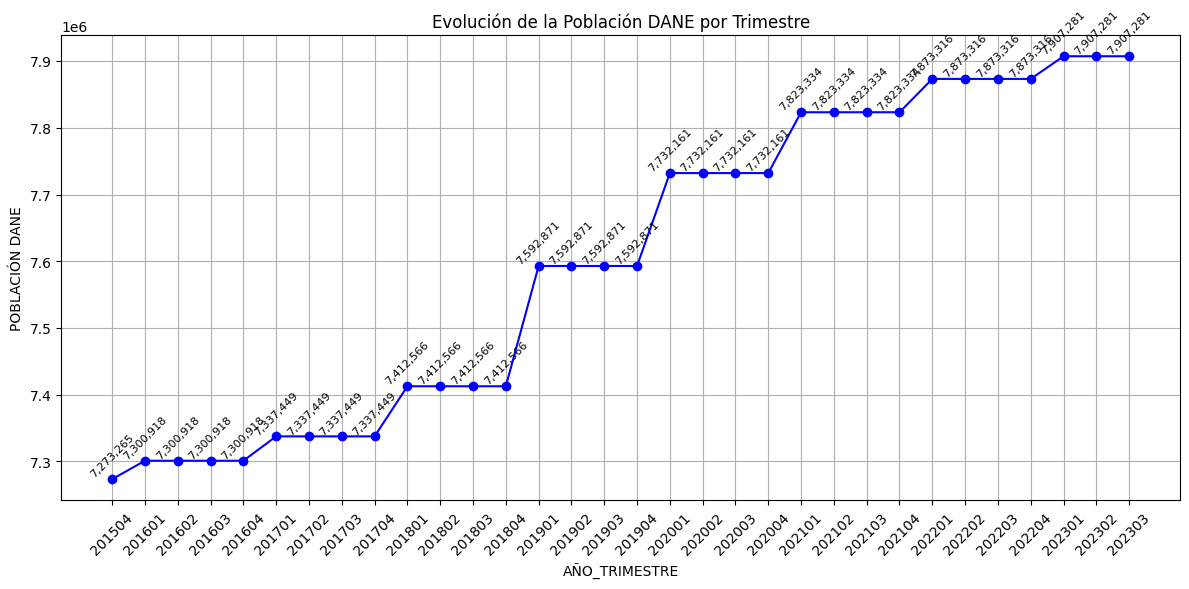

In [13]:


#bogota_data = pd.read_csv('bogota_data_actualizado.csv')

# Convertir AÑO_TRIMESTRE a string para ordenarlo correctamente en el gráfico
bogota_data['AÑO_TRIMESTRE'] = bogota_data['AÑO_TRIMESTRE'].astype(str)

# Ordenar por AÑO_TRIMESTRE para asegurar la secuencia temporal correcta
bogota_data = bogota_data.sort_values(by='AÑO_TRIMESTRE')

# Crear el gráfico de líneas
plt.figure(figsize=(12, 6))
plt.plot(bogota_data['AÑO_TRIMESTRE'], bogota_data['POBLACIÓN DANE'], marker='o', linestyle='-', color='b')
plt.title('Evolución de la Población DANE por Trimestre')
plt.xlabel('AÑO_TRIMESTRE')
plt.ylabel('POBLACIÓN DANE')

# Etiquetas para cada punto del gráfico con el valor completo
for i, (x, y) in enumerate(zip(bogota_data['AÑO_TRIMESTRE'], bogota_data['POBLACIÓN DANE'])):
    plt.text(x, y, f'{int(y):,}', ha='center', va='bottom', fontsize=8, rotation=45)

# Personalizar el eje x solo con los trimestres presentes en los datos
plt.xticks(ticks=range(len(bogota_data)), labels=bogota_data['AÑO_TRIMESTRE'], rotation=45)

plt.grid(True)
plt.tight_layout()
plt.show()


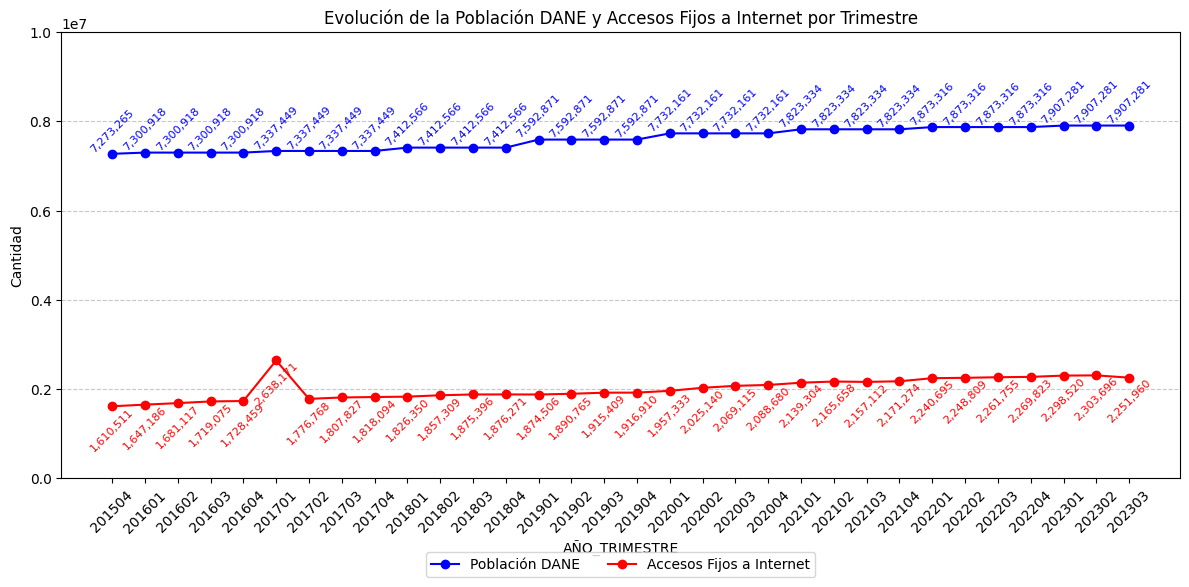

In [15]:

#bogota_data = pd.read_csv('bogota_data_actualizado.csv')

# Convertir AÑO_TRIMESTRE a string para ordenar correctamente en el gráfico
bogota_data['AÑO_TRIMESTRE'] = bogota_data['AÑO_TRIMESTRE'].astype(str)

# Ordenar por AÑO_TRIMESTRE para asegurar la secuencia temporal correcta
bogota_data = bogota_data.sort_values(by='AÑO_TRIMESTRE')

# Configurar la figura
plt.figure(figsize=(12, 6))

# Graficar la Población DANE en azul
plt.plot(bogota_data['AÑO_TRIMESTRE'], bogota_data['POBLACIÓN DANE'], marker='o', linestyle='-', color='b', label='Población DANE')

# Graficar los Accesos Fijos a Internet en rojo
plt.plot(bogota_data['AÑO_TRIMESTRE'], bogota_data['No. ACCESOS FIJOS A INTERNET'], marker='o', linestyle='-', color='r', label='Accesos Fijos a Internet')

# Añadir título y etiquetas
plt.title('Evolución de la Población DANE y Accesos Fijos a Internet por Trimestre')
plt.xlabel('AÑO_TRIMESTRE')
plt.ylabel('Cantidad')

# Etiquetas para cada punto de la Población DANE
for x, y in zip(bogota_data['AÑO_TRIMESTRE'], bogota_data['POBLACIÓN DANE']):
    plt.text(x, y, f'{int(y):,}', ha='center', va='bottom', fontsize=8, rotation=45, color='blue')

# Etiquetas para cada punto de Accesos Fijos a Internet
for x, y in zip(bogota_data['AÑO_TRIMESTRE'], bogota_data['No. ACCESOS FIJOS A INTERNET']):
    plt.text(x, y, f'{int(y):,}', ha='center', va='top', fontsize=8, rotation=45, color='red')

# Mostrar la leyenda debajo del gráfico
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=2)

# Configurar límites y cuadrícula
plt.ylim(0, 10000000)  # Limitar el eje Y hasta 10 millones
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Cuadrícula solo en el eje Y

# Personalizar el eje x solo con los trimestres presentes en los datos
plt.xticks(ticks=range(len(bogota_data)), labels=bogota_data['AÑO_TRIMESTRE'], rotation=45)

# Activar cuadrícula
plt.tight_layout()
plt.show()

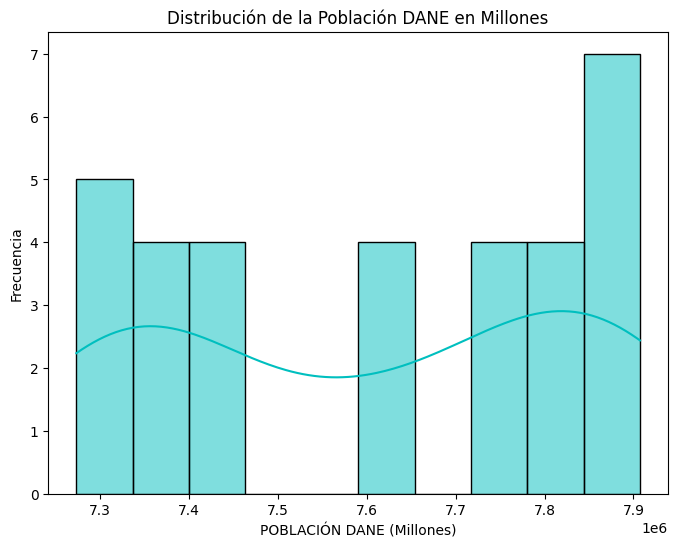

In [19]:
import seaborn as sns

# Histograma para "POBLACIÓN DANE" en millones
plt.figure(figsize=(8, 6))
sns.histplot(bogota_data['POBLACIÓN DANE'], bins=10, kde=True, color='c')
plt.title('Distribución de la Población DANE en Millones')
plt.xlabel('POBLACIÓN DANE (Millones)')
plt.ylabel('Frecuencia')
plt.show()


Ahora se comprobara cuantos datos y de que periodos faltan

In [20]:
# A continuación, se define la función para encontrar trimestres faltantes

def encontrar_trimestres_faltantes(data, anio_inicial, anio_final):
    faltantes = []
    # Convertir la columna a string
    data['AÑO_TRIMESTRE'] = data['AÑO_TRIMESTRE'].astype(str)

    # Iterar sobre cada año en el rango
    for anio in range(anio_inicial, anio_final + 1):
        # Crear un conjunto con los trimestres esperados para el año actual
        trimestres_esperados = {f"{anio}0{t}" for t in range(1, 5)}
        # Filtrar los trimestres presentes en el DataFrame para el año actual
        trimestres_presentes = set(data[data['AÑO_TRIMESTRE'].str.startswith(str(anio))]['AÑO_TRIMESTRE'])
        # Calcular los trimestres faltantes comparando con los esperados
        trimestres_faltantes = trimestres_esperados - trimestres_presentes
        # Agregar los trimestres faltantes a la lista
        faltantes.extend(sorted(trimestres_faltantes))

    return faltantes

# Usar la función con los años inicial y final
anio_inicial = 2015
anio_final = 2025
trimestres_faltantes = encontrar_trimestres_faltantes(bogota_data, anio_inicial, anio_final)

# Mostrar los trimestres faltantes
print(trimestres_faltantes)

['201501', '201502', '201503', '202304', '202401', '202402', '202403', '202404', '202501', '202502', '202503', '202504']
